In [67]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [69]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [70]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [71]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_market_data)

# predict/transform
scaled_data = scaler.transform(df_market_data)
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)
df_scaled.index = df_market_data.index #bringing back non-numeric index values

# df_scaled = df_scaled.reset_index() #reseting so coin name is a column

df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [72]:
df_scaled.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


---

### Find the Best Value for k Using the Original Data.

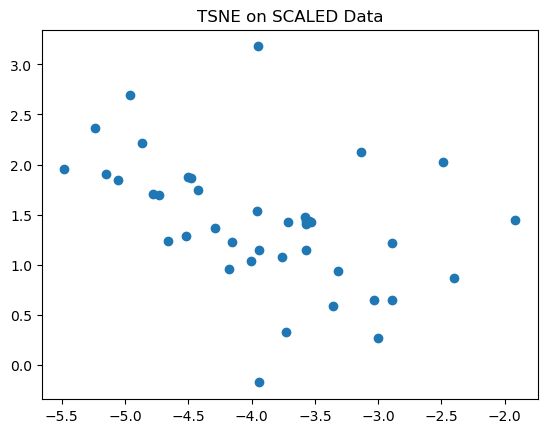

In [73]:
#determining  if data can be clustered via TSNE
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [74]:
#not using TSNE due to low sample size  
#moving to unsupervised clustering next

In [75]:
# Do Unsupervised Clustering

# KMeans on SCALED (not PCA) DATA

# Define your "X" - features to predict
X = df_scaled

In [76]:
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 19)) # k =1 breaks the silhouette score metric

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 18
Finished 3 out of 18
Finished 4 out of 18
Finished 5 out of 18
Finished 6 out of 18
Finished 7 out of 18
Finished 8 out of 18
Finished 9 out of 18
Finished 10 out of 18
Finished 11 out of 18
Finished 12 out of 18
Finished 13 out of 18
Finished 14 out of 18
Finished 15 out of 18
Finished 16 out of 18
Finished 17 out of 18
Finished 18 out of 18


In [77]:
 # Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)


,k,inertia,silhouette_score,cha_score,acc
0,2,212.123342,0.690885,13.766470,NaN
1,3,165.136752,0.260810,14.021117,-46.986590
2,4,79.022435,0.314482,32.459853,-86.114317
3,5,66.413051,0.323913,29.892958,-12.609385
4,6,61.634088,0.251616,25.595599,-4.778963
5,7,46.074467,0.258868,29.631263,-15.559621
6,8,43.392694,0.252185,26.466078,-2.681773
7,9,32.913223,0.260185,30.879599,-10.479471
8,10,30.469111,0.168099,29.000071,-2.444111
9,11,26.480101,0.175935,29.514981,-3.989010


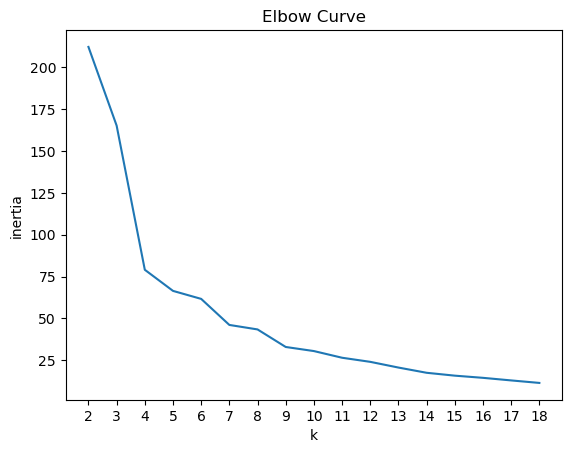

In [78]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the DataFrame
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

In [79]:
df_elbow_org = df_elbow.copy()
df_elbow_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   k                 17 non-null     int64  
 1   inertia           17 non-null     float64
 2   silhouette_score  17 non-null     float64
 3   cha_score         17 non-null     float64
 4   acc               16 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 808.0 bytes


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4 - elbow plot shows signifigant drop off in the inertia after k = 4 as seen in the above chart and df_elbow.head(). This is futher seen by comparing the silhouette score and ratio criterion.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [80]:
# Initialize the K-Means model using the best value for k
df_sub = df_scaled.copy()

# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub2 = df_sub.copy()
df_sub2['clusters'] = preds

df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [81]:
# Add a new column to the DataFrame with the predicted clusters
df_sub2['clusters'] = preds

# Display sample data
df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


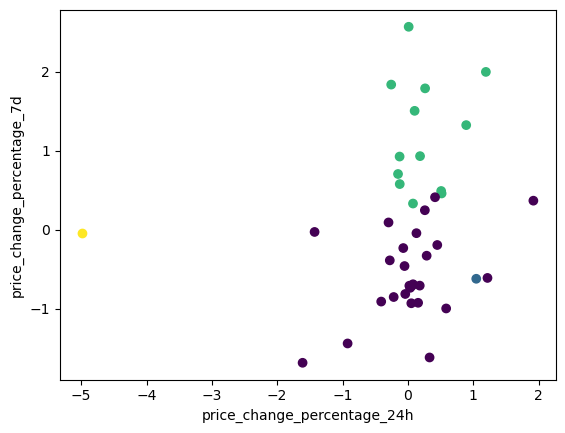

In [82]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
 # Plot the clusters
plt.scatter(df_sub2.price_change_percentage_24h, df_sub2.price_change_percentage_7d, c=df_sub2.clusters)
plt.ylabel("price_change_percentage_7d")
plt.xlabel("price_change_percentage_24h")
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [83]:
corrs = df_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


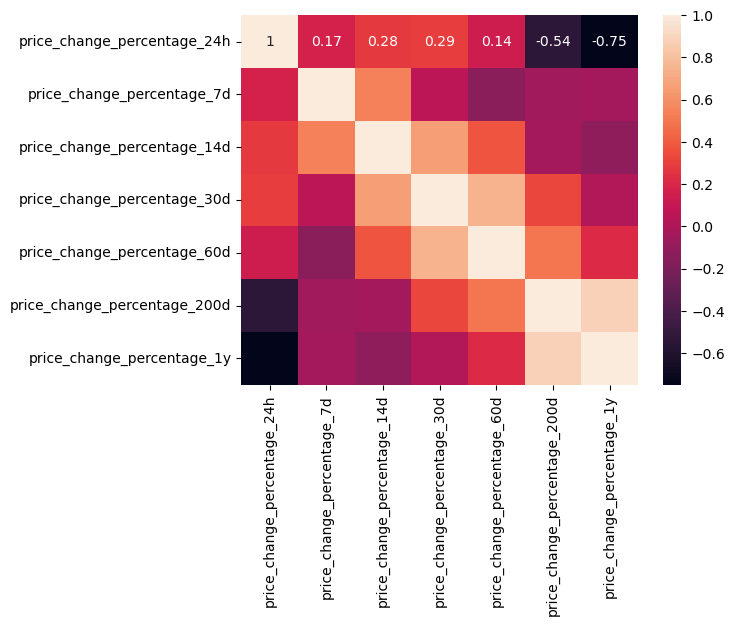

In [84]:
sns.heatmap(corrs, annot=True)
plt.show()

In [85]:
# Init
n_components = len(df_scaled.columns)
pca=PCA(n_components=n_components)

# Fit the PCA model on the transformed credit card DataFrame
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_scaled.index

df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
coin_id,,,,,,,
bitcoin,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595
ethereum,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593
tether,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857
ripple,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870
bitcoin-cash,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411


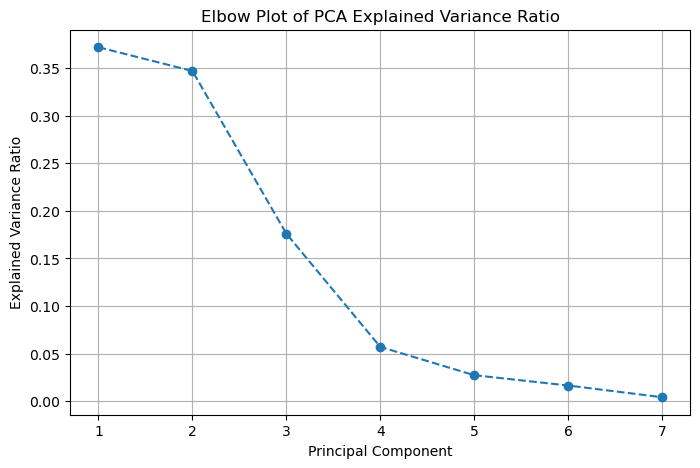

In [86]:
# Create a PCA model instance and set `n_components=3`.
# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [87]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.


#summing explained variance ratio to determine how much n_componentes =3 expains the variance ratio 
#this still explains the variance in the dataset and indicates its worth considering dimensionality reduction
sum(explained_variance_ratio[0:3])

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Variance for n_components = 0.8950316570309841 (89.5%)

In [88]:
# Display sample data
df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
coin_id,,,,,,,
bitcoin,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595
ethereum,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593
tether,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857
ripple,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870
bitcoin-cash,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411


---

### Find the Best Value for k Using the PCA Data

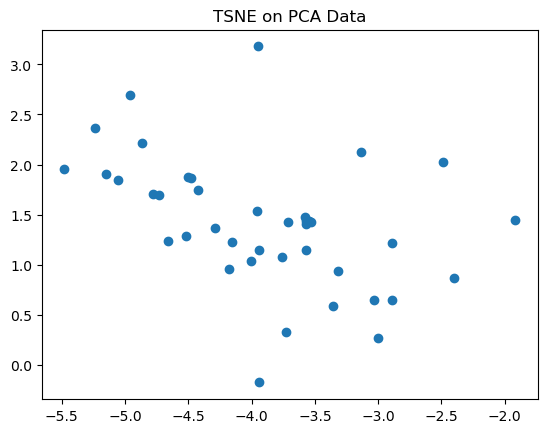

In [89]:
# Create a list with the number of k-values from 1 to 11
#determining  if data can be clustered via TSNE
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_pca)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on PCA Data")
plt.show()

In [90]:
# Do Unsupervised Clustering

# KMeans on SCALED (not PCA) DATA

# Define your "X" - features to predict
X = df_pca

In [91]:
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
k = list(range(2, 12)) # k =1 breaks the silhouette score metric

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [92]:
 # Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow2 = pd.DataFrame(elbow_data)

df_elbow2["acc"] = df_elbow2.inertia.diff()

# Review the DataFrame
df_elbow2.head(20)


,k,inertia,silhouette_score,cha_score,acc
0,2,212.123342,0.690885,13.766470,NaN
1,3,165.136752,0.260810,14.021117,-46.986590
2,4,79.022435,0.314482,32.459853,-86.114317
3,5,66.413051,0.323913,29.892958,-12.609385
4,6,61.634088,0.251616,25.595599,-4.778963
5,7,46.074467,0.258868,29.631263,-15.559621
6,8,43.392694,0.252185,26.466078,-2.681773
7,9,32.913223,0.260185,30.879599,-10.479471
8,10,30.469111,0.168099,29.000071,-2.444111
9,11,26.480101,0.175935,29.514981,-3.989010


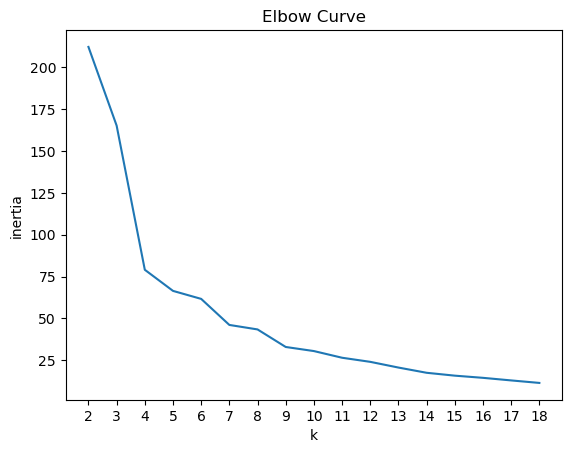

In [93]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the DataFrame
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

In [94]:
df_elbow_pca = df_elbow2.copy()
df_elbow_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   k                 10 non-null     int64  
 1   inertia           10 non-null     float64
 2   silhouette_score  10 non-null     float64
 3   cha_score         10 non-null     float64
 4   acc               9 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Best K value is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it does not differ from the prior best K value

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [95]:
# Initialize the K-Means model using the best value for k
df_sub = df_pca.copy()

# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub3 = df_sub.copy()
df_sub3['clusters'] = preds

df_sub3.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,clusters
coin_id,,,,,,,,
bitcoin,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595,2
ethereum,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593,2
tether,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857,0
ripple,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870,0
bitcoin-cash,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411,2


In [96]:
# Add a new column to the DataFrame with the predicted clusters
df_sub3['clusters'] = preds

# Display sample data
df_sub3.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,clusters
coin_id,,,,,,,,
bitcoin,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595,2
ethereum,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593,2
tether,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857,0
ripple,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870,0
bitcoin-cash,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411,2


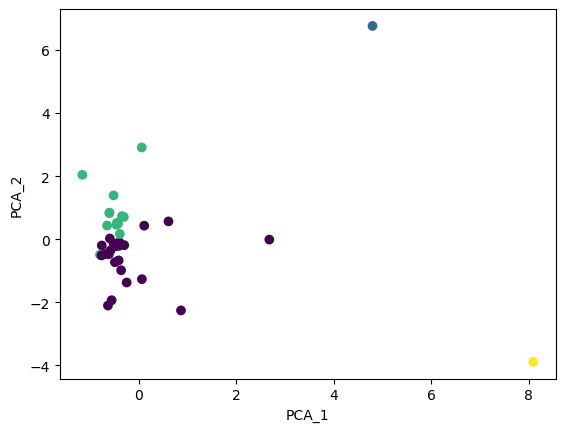

In [97]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

plt.scatter(df_sub3.PCA_1, df_sub3.PCA_2, c=df_sub3.clusters)
plt.ylabel("PCA_2")
plt.xlabel("PCA_1")
plt.show()

In [98]:
df_sub2.loc[df_sub2.clusters.isin([1,3])]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625,3
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488,1


In [99]:
df_elbow_org.head(10)

,k,inertia,silhouette_score,cha_score,acc
0,2,212.123342,0.690885,13.766470,NaN
1,3,165.136752,0.260810,14.021117,-46.986590
2,4,79.022435,0.314482,32.459853,-86.114317
3,5,66.413051,0.323913,29.892958,-12.609385
4,6,61.634088,0.251616,25.595599,-4.778963
5,7,46.074467,0.258868,29.631263,-15.559621
6,8,43.392694,0.252185,26.466078,-2.681773
7,9,32.913223,0.260185,30.879599,-10.479471
8,10,30.469111,0.168099,29.000071,-2.444111
9,11,26.480101,0.175935,29.514981,-3.989010


In [100]:
df_elbow_pca.head(10)

,k,inertia,silhouette_score,cha_score,acc
0,2,212.123342,0.690885,13.766470,NaN
1,3,165.136752,0.260810,14.021117,-46.986590
2,4,79.022435,0.314482,32.459853,-86.114317
3,5,66.413051,0.323913,29.892958,-12.609385
4,6,61.634088,0.251616,25.595599,-4.778963
5,7,46.074467,0.258868,29.631263,-15.559621
6,8,43.392694,0.252185,26.466078,-2.681773
7,9,32.913223,0.260185,30.879599,-10.479471
8,10,30.469111,0.168099,29.000071,-2.444111
9,11,26.480101,0.175935,29.514981,-3.989010


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

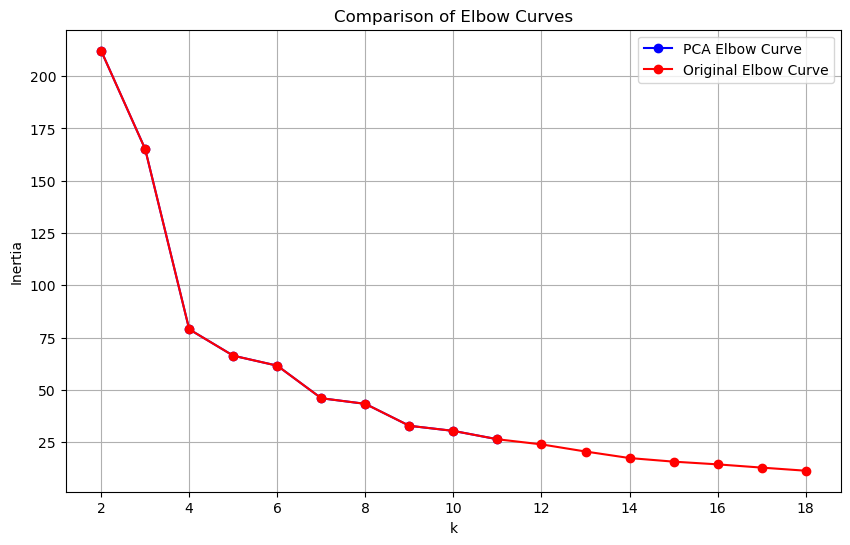

In [101]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(10, 6))

# Plot for PCA elbow curve
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], label="PCA Elbow Curve", color="blue", marker='o')

# Plot for Original elbow curve
plt.plot(df_elbow_org["k"], df_elbow_org["inertia"], label="Original Elbow Curve", color="red", marker='o')

# Adding titles and labels
plt.title("Comparison of Elbow Curves")
plt.xlabel("k")
plt.ylabel("Inertia")

# Adding legend to distinguish between the two curves
plt.legend()

# Optionally, add grid for better readability
plt.grid(True)

# Show plot
plt.show()

In [102]:
#The Elbow curves seem to overlap - commenting out the line for the Origional Data does show the PCA data below it

In [103]:
# Composite plot to contrast the clusters
plt.figure(figsize=(12, 8))

# Plot scatter for df_sub2
plt.scatter(df_sub2.price_change_percentage_24h, df_sub2.price_change_percentage_7d, c=df_sub2['cluster'], cmap='viridis', label='Clusters in df_sub2', marker='o')

# Plot scatter for df_sub3
plt.scatter(df_sub3.PCA_1, df_sub3.PCA_2, c=df_sub3['cluster'], cmap='plasma', label='Clusters in df_sub3', marker='x')

# Adding titles and labels
plt.title("Cluster Visualization")
plt.xlabel("X")
plt.ylabel("Y")

# Adding legend to distinguish between the two scatter plots
plt.legend()

# Optionally, add grid for better readability
plt.grid(True)

# Show plot
plt.show()


KeyError: 'cluster'

<Figure size 1200x800 with 0 Axes>

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** After visualizing, the impact of using fewer feature clusters is that the outliers are more strongly seen within their own cluster due to 90% of the data being incorporated within 2 of the clusters while the outliers are shown within their own clusters respectivly for each data set used, Origional and PCA data. 